#### My work on the Chapter 4 of the book: Practical Machine Learning and Image Processing
### Content:
* Blending two images
* Changing the contrast and brightness of an image
* Adding text to images
* Smoothing images
* Changing the shape of images
* Effecting image thresholding
* Calculating gradients to detect edges
* Performing histogram equalization

# Chapter 04 
### Advanced Image Processing Using OpenCV

# Blending two images

### OpenCV imread() is BGR

Testing how cv2 color works:

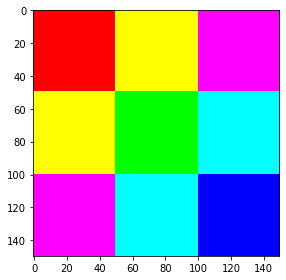

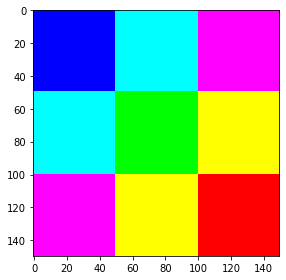

In [37]:
import cv2
from skimage import io
from pylab import *

img_cv2 = cv2.imread('../input/imgbovespa/squares.png')
img_io = io.imread('../input/imgbovespa/squares.png')

figure(0)
io.imshow(img_cv2)
figure(1)
io.imshow(img_io)

So the same images are plotted differently above. That's because RED and BLUE channels are swapped in cv2. 

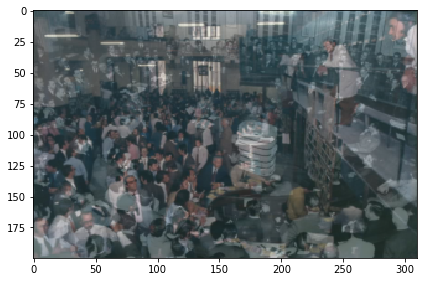

In [38]:
from skimage.transform import resize

img1 = cv2.imread('../input/imgbovespa/BOVESPA.jpg')
img2 = cv2.imread('../input/imgbovespa/BMSP.jpg')

# Setting images to the same size
img1 = resize(img1, (200, 310))
img2 = resize(img2, (200, 310))

## IF I DONT CONVERT ITS TYPE when I try to use the function cv2.COLOR_BGR2RGB, it throws
## the error: "Unsupported depth of input image"
img1 = np.float32(img1)
img2 = np.float32(img2)

# Converting from BGR to RGB:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Defining alpha and beta, which indicate the transparency of both images
alpha = 0.6
beta = 0.4

# Blending images
final_img = cv2.addWeighted(img1_rgb, alpha, img2_rgb, beta, 0.0) #this last parameter is gamma

io.imshow(final_img)

# Changing Contrast and Brightness

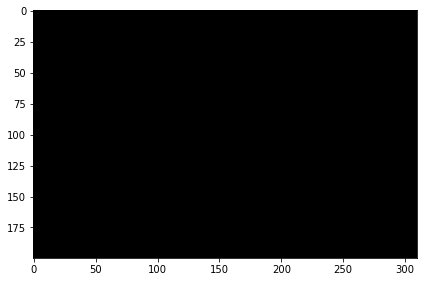

In [39]:
import numpy as np

#Creating a dummy image that stores different contrast and brightness
dummy_img = np.zeros(img1.shape, img1.dtype)
io.imshow(dummy_img)

In [44]:
dummy_img.dtype

dtype('float32')

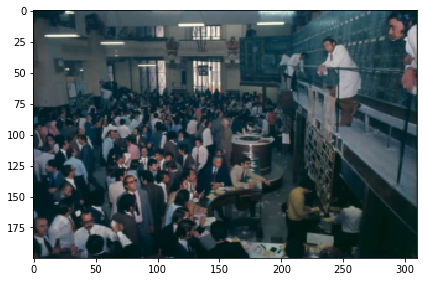

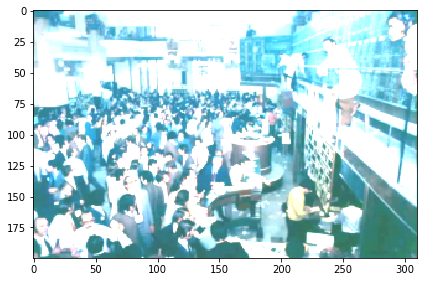

In [68]:
from pylab import *

#Setting the brightness and contrast paramenters
contrast = 3.0 # the contrast is the angular coeficient
bright = 0.2 # the bright is the linear coeficient (this value should be between the 0 and 1 for this case)

#Changing the contrast and brightness
for y in range(img1_rgb.shape[0]):
    for x in range(img1_rgb.shape[1]):
        for c in range(img1_rgb.shape[2]):
            dummy_img[y,x,c] = np.clip(contrast*img1_rgb[y,x,c] + bright, 0, 1)# ( c*img[i] + b )
                                                                               # the pixel vales are 0 to 1

figure(0)
io.imshow(img1_rgb)
figure(1)
io.imshow(dummy_img)

# Adding text to images